### Roud-Robin 演算法
Every process arrived at time 0

In [109]:
%matplotlib inline
import sys
import numpy as np
import copy
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
user_input = raw_input("Enter numbers separated by space: ")
user_input2 = raw_input("Max time quantum: ")
time_quantum = range(1,int(user_input2)+1)
average_turnaround_time = [0]*int(user_input2)
input_list = user_input.split(' ')
input_queue = [[i+1,int(x.strip())] for i,x in enumerate(input_list)]
for data in numbers:
    print 'P',data[0],' :',data[1]

Enter numbers separated by space: 6 3 1 7
Max time quantum: 15
P 1  : 6
P 2  : 3
P 3  : 1
P 4  : 7


In [124]:
def Roud_Robin(waiting_queue,time_quantum):
#     print(waiting_queue)
    finish_time = np.zeros(len(numbers),dtype=np.int)
    time = 0
    while len(waiting_queue)!=0:
        select_process = waiting_queue.pop(0)
        select_process[1]-=time_quantum
        if select_process[1]<=0:# process complished precisely or eariler than usual
            time = time + time_quantum + select_process[1]
            finish_time[select_process[0]-1] = time
        else:
            time = time + time_quantum
            waiting_queue.append(select_process)
#         print(waiting_queue)
#     print('-------------finish algorism------------------------')
#     print 'turnaround time ',finish_time
#     print 'average_turnaround_time',sum(finish_time)/float(len(finish_time))
#     print ''
    return sum(finish_time)/float(len(finish_time))
for i in range(int(user_input2)):
    waiting_queue = copy.deepcopy(input_queue)
    average_turnaround_time[i] = Roud_Robin(waiting_queue,time_quantum[i])

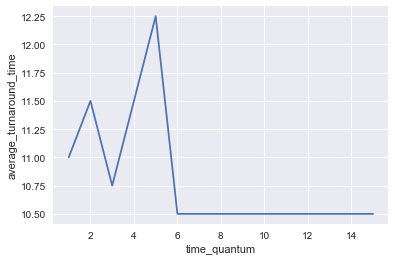

In [125]:
ax = plt.plot(time_quantum,average_turnaround_time)
plt.ylabel('average_turnaround_time')
plt.xlabel('time_quantum')
plt.show()

In [120]:
time_quantum

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

### Prediction of the Length of the next CPU burst

In [135]:
user_input_burst = raw_input("Enter numbers separated by space: ")
user_input_burst = user_input_burst.split(' ')
input_burst = [int(x.strip())for x in user_input_burst]

Enter numbers separated by space: 6 4 6 4 13 13 13


In [143]:
guess = np.zeros(len(input_burst)+1)
guess[0] = 10
alpha = 0.5
for i in range(len(input_burst)):
    guess[i+1] = alpha*input_burst[i]+(1-alpha)*guess[i]

array([ 10.,   8.,   6.,   6.,   5.,   9.,  11.,  12.])

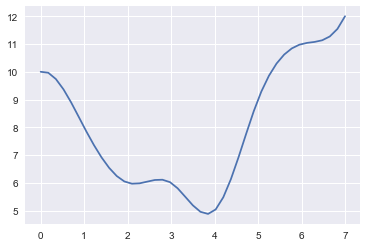

In [152]:
from scipy.interpolate import interp1d
f2 = interp1d(range(len(input_burst)+1), guess, kind='cubic')
xnew = np.linspace(0, len(input_burst), num=41, endpoint=True)
plt.plot(xnew,f2(xnew))
guess

In [153]:
xnew

array([ 0.   ,  0.175,  0.35 ,  0.525,  0.7  ,  0.875,  1.05 ,  1.225,
        1.4  ,  1.575,  1.75 ,  1.925,  2.1  ,  2.275,  2.45 ,  2.625,
        2.8  ,  2.975,  3.15 ,  3.325,  3.5  ,  3.675,  3.85 ,  4.025,
        4.2  ,  4.375,  4.55 ,  4.725,  4.9  ,  5.075,  5.25 ,  5.425,
        5.6  ,  5.775,  5.95 ,  6.125,  6.3  ,  6.475,  6.65 ,  6.825,  7.   ])

[0, 1, 2, 3, 4, 5, 6, 7]